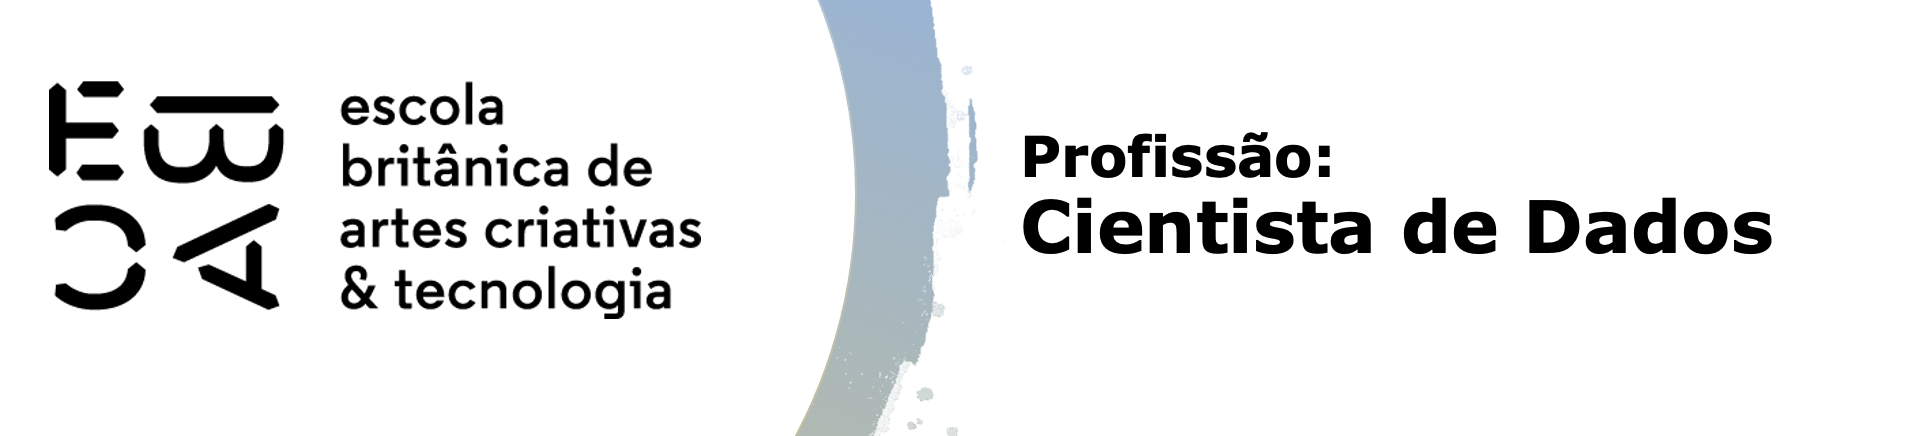

# Módulo 26 - Algelin

# Tarefa - Álgebra Linear

## 0. Carregamento de Pacotes e Dados Necessários 
Nesta tarefa serão usados os pacotes:
- pandas para a montagem e leitura de dataframes;
- numpy para operações matemáticas com os dados;
- matplotlib.pyplot para a montagem de gráficos;
- seaborn para a análise gráfica.

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

A célula abaixo gera dados de notas de duas provas, p1 e p2, conforme em aula, mas com mais alunos.

In [3]:
# Gerando os dados
np.random.seed(123)

p1 = np.random.random(50) *10
p1[p1>10] = 10
p1[p1<0] = 0

p2 = p1 + np.random.normal(0,1,50)
p2[p2>10] = 10
p2[p2<0] = 0

df = pd.DataFrame({'p1': p1, 'p2': p2})

Visualização do DataFrame gerado:

In [4]:
# Configurando o estilo das notas, definindo precisão = 1 e "," como separador decimal
df.style.format(precision=1, decimal=',')

,p1,p2
0,"7,0","7,9"
1,"2,9","5,1"
2,"2,3","1,0"
3,"5,5","4,5"
4,"7,2","8,9"
5,"4,2","3,4"
6,"9,8","9,8"
7,"6,8","7,9"
8,"4,8","5,7"
9,"3,9","5,7"


## 1. Reduzindo correlações

a) Já vimos que expressar os dados através da média e diferença é uma transformação linear. Obtenha a média e a diferença através de uma multiplicação matricial, conforme visto em aula.

b) Calcule a correlação entre os dados da **p1** e **p2**

c) Calcule a correlação entre os dados transformados (média e diferença)

d) Comente as correlações observadas.

In [5]:
# a) Cálculo da média e da diferença das notas

# matriz cuja primeira linha da a média, e a segunda da a diferença 
m = np.array([[.5, .5],
              [-1,  1]])

# Produto matricial entre m e o dataframe com p1 e p2
prod_matric = np.matmul(m, df[['p1', 'p2']].to_numpy().transpose())

# Insere a média e a diferença no dataframe
df['média'] = prod_matric[0]
df['diferença'] = prod_matric[1]

# Mostra o df formatado
df.style.format(precision=1, decimal=',')

,p1,p2,média,diferença
0,"7,0","7,9","7,5","1,0"
1,"2,9","5,1","4,0","2,2"
2,"2,3","1,0","1,6","-1,3"
3,"5,5","4,5","5,0","-1,0"
4,"7,2","8,9","8,1","1,7"
5,"4,2","3,4","3,8","-0,8"
6,"9,8","9,8","9,8","0,0"
7,"6,8","7,9","7,4","1,1"
8,"4,8","5,7","5,3","0,9"
9,"3,9","5,7","4,8","1,8"


Correlação entre p1 e p2 é: 0.8957365818728046


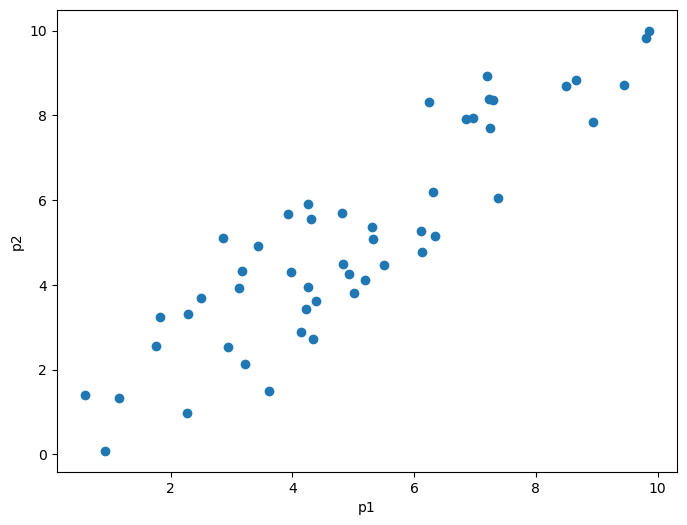

In [27]:
# b) Correlação entre p1 e p2
corr1 = df['p1'].corr(df['p2'])
print(f'Correlação entre p1 e p2 é: {corr1}')

# Gráfico p2 x p1
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6))

plt.scatter(x=df.p1, y=df.p2)
ax.set_xlabel('p1')
ax.set_ylabel('p2')

plt.show()

Correlação entre média e diferença é: 0.13347385411788837


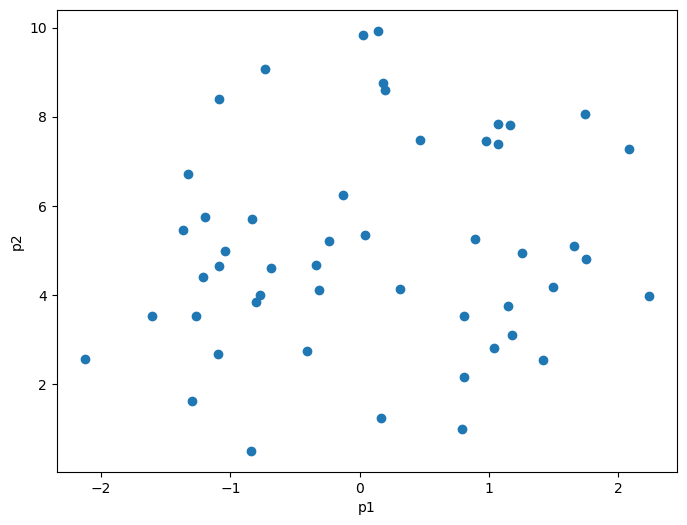

In [30]:
# c) Correlação entre média e diferença
corr2 = df['média'].corr(df['diferença'])
print(f'Correlação entre média e diferença é: {corr2}')

# Gráfico média x diferença
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6))

plt.scatter(x=df['diferença'], y=df['média'])
ax.set_xlabel('diferença')
ax.set_ylabel('média')

plt.show()

_*d) Comentários sobre as Correlações observadas*_

Sobre os valores das correlações, foi notado que a correlação entre **p1** e **p2** (~ 0,89) foi muito maior do que entre **média** e **diferença** (~ -0.13). 

No caso da primeira correlação, dado que ela é bem próxima a 1, à medida que o aluno apresenta uma nota alta na primeira prova, há uma grande tendência dele também ter uma nota alta na segunda prova. O gráfico dessas duas variáveis concorda com essa tendência, uma vez que elas apresentam um comportamento próximo ao de uma reta crescente. 

Por outro lado, a segunda correlação tem um valor muito próximo a zero e negativo, implicando que as variáveis **média** e **diferença** quase não estão relacionadas. Devido ao sinal negativo, há uma baixíssima tendência do aluno apresentar uma média alta nas duas provas e ter obtido notas muito diferentes entre elas. Ou seja, quanto maior a média, menor será a diferença. Visualizando o gráfico de tais variáveis, não são notadas tendências de correlação entre elas devido ao espalhamento dos dados. 

## 2. Soma e diferença

Realize agora uma transformação semelhante, mas que ao invés da média, dê a soma da **p1** e **p2**. Construa o gráfico e conclua que diferenças visuais você observa.

In [8]:
# matriz cuja primeira linha da a média, e a segunda da a diferença 
m = np.array([[1,  1],
              [-1, 1]])

# Produto matricial entre m e o dataframe com p1 e p2
prod_matric = np.matmul(m, df[['p1', 'p2']].to_numpy().transpose())

# Insere a média e a diferença no dataframe
df['soma'] = prod_matric[0]
df['diferença'] = prod_matric[1]

# Mostra o df formatado
df.style.format(precision=1, decimal=',')

,p1,p2,média,diferença,soma
0,"7,0","7,9","7,5","1,0","14,9"
1,"2,9","5,1","4,0","2,2","8,0"
2,"2,3","1,0","1,6","-1,3","3,2"
3,"5,5","4,5","5,0","-1,0","10,0"
4,"7,2","8,9","8,1","1,7","16,1"
5,"4,2","3,4","3,8","-0,8","7,7"
6,"9,8","9,8","9,8","0,0","19,6"
7,"6,8","7,9","7,4","1,1","14,8"
8,"4,8","5,7","5,3","0,9","10,5"
9,"3,9","5,7","4,8","1,8","9,6"


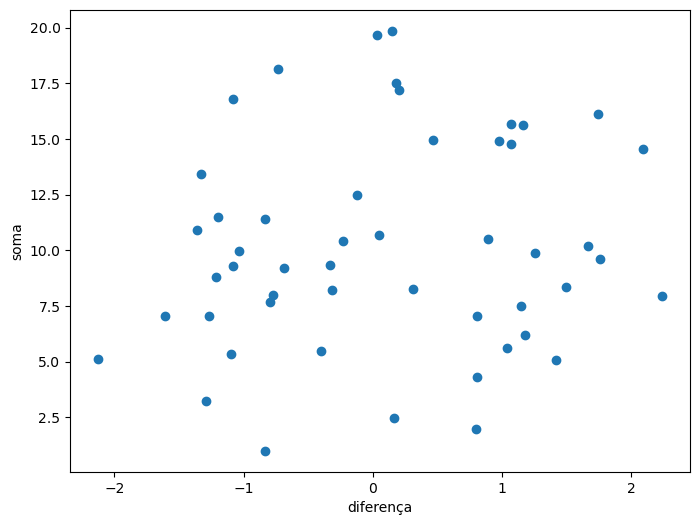

In [32]:
# Gráfico Soma x Diferença
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6))

plt.scatter(x=df['diferença'], y=df.soma)
ax.set_xlabel('diferença')
ax.set_ylabel('soma')

plt.show()

O gráfico das variáveis **soma** e **diferença** apresenta um comportamento dos dados muito semelhante ao gráfico da **média** em função da **diferença**. A única mudança visualmente notável entre eles é a de que os valores no eixo y do segundo gráfico (variável **soma**) são o dobro do que os presentes no primeiro (variável **média**); tanto que no segundo gráfico, os valores variam entre 0 e 20, enquanto que no outro, os valores estão entre 0 e 10. Tal alteração já era esperada, uma vez que as fórmulas destas variáveis apresentam este comportamento.

$$ soma = p1 + p2 $$ 

$$ média = \frac{p1 + p2}{2} $$

Logo, 

$$ média = \frac{soma}{2} $$

